<a href="https://colab.research.google.com/github/MonikaLamba/Tensor-Flow-/blob/main/Image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.15.0


In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
len(train_labels)

60000

In [6]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [7]:
test_images.shape

(10000, 28, 28)

In [8]:
len(test_labels)

10000

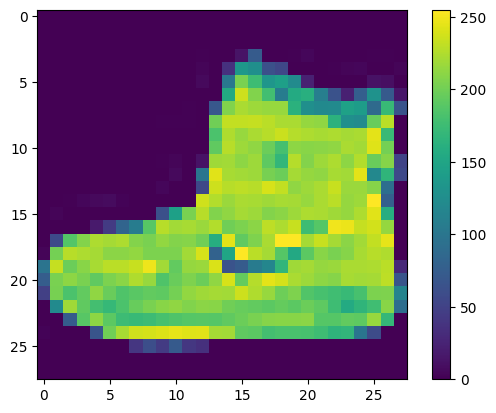

In [9]:
plt.figure()
plt.imshow(train_images[0])  # INDEX 0 IS ANGLE BOOT
plt.colorbar()
plt.grid(False)
plt.show()

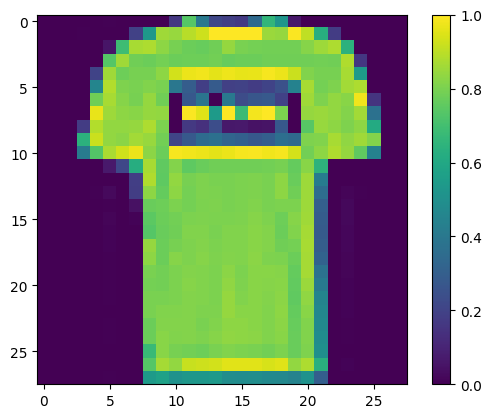

In [30]:
plt.figure()
plt.imshow(train_images[1])  # INDEX 1 IS TSHIRT
plt.colorbar()
plt.grid(False)
plt.show()

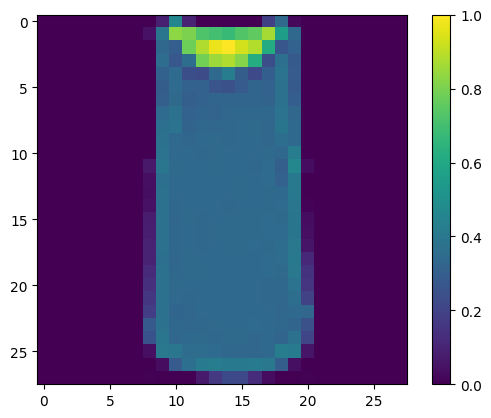

In [31]:
plt.figure()
plt.imshow(train_images[2])  #
plt.colorbar()
plt.grid(False)
plt.show()

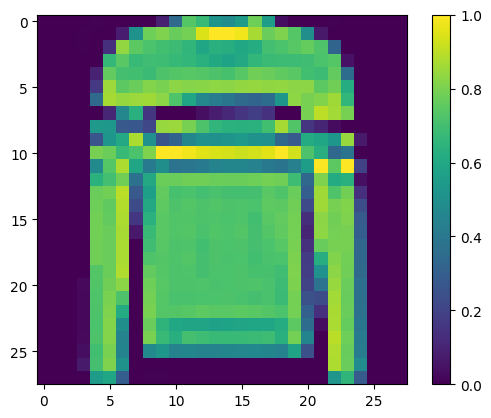

In [32]:
plt.figure()
plt.imshow(train_images[5])  # INDEX 1 IS ANGLE BOOT
plt.colorbar()
plt.grid(False)
plt.show()

In [10]:
train_images = train_images / 255.0

test_images = test_images / 255.0

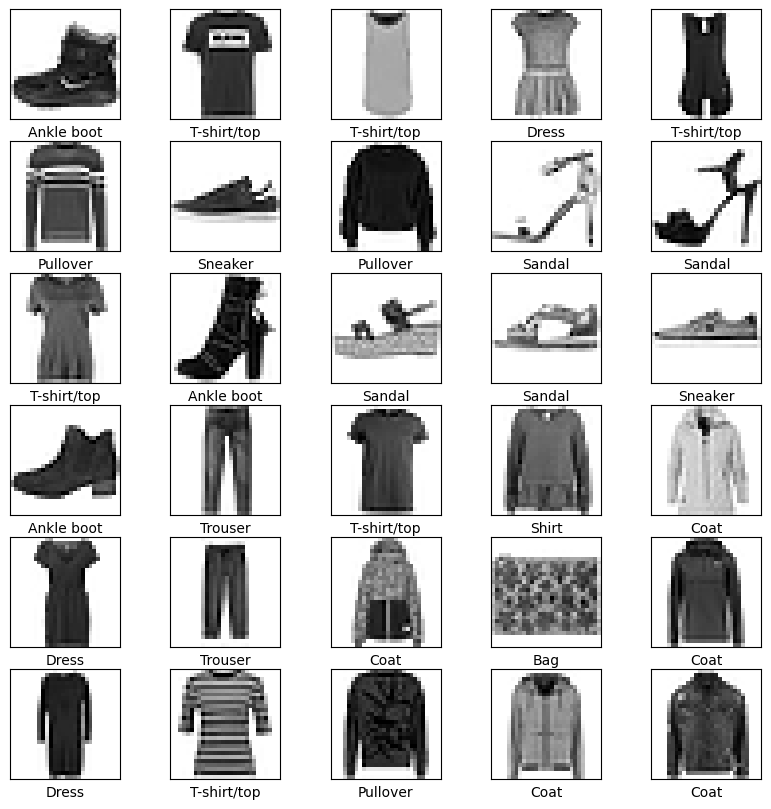

In [35]:
plt.figure(figsize=(10,10))
# 25 IS TOTAL IMAGES SHOWN FIRST 25
for i in range(30):
    plt.subplot(6,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [12]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [13]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [14]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 11s 5ms/step - loss: 0.4995 - accuracy: 0.8250
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3737 - accuracy: 0.8642
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3368 - accuracy: 0.8776
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3137 - accuracy: 0.8847
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2950 - accuracy: 0.8919
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2800 - accuracy: 0.8967
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2690 - accuracy: 0.9010
Epoch 8/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2555 - accuracy: 0.9055
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2479 - accuracy: 0.9073
Epoch 10/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.23

In [15]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.3416 - accuracy: 0.8812 - 990ms/epoch - 3ms/step

Test accuracy: 0.8812000155448914


In [16]:
probability_model = tf.keras.Sequential([model,
                                         tf.keras.layers.Softmax()])

In [17]:
predictions = probability_model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


In [18]:
predictions[0]    # LABEL 10 IS HAVING HIGHEST CONFIDENCE I.E 9.35

array([8.2460637e-08, 1.5850063e-09, 3.8023883e-11, 9.8047204e-12,
       5.7377787e-09, 1.4997099e-03, 4.4153046e-09, 6.2657721e-02,
       1.3381211e-07, 9.3584234e-01], dtype=float32)

In [36]:
predictions[1]

array([2.3243954e-05, 5.1282512e-14, 9.9664724e-01, 1.1013391e-09,
       2.5888968e-03, 3.7594074e-11, 7.4066257e-04, 1.8880361e-14,
       1.3170315e-10, 8.3154952e-15], dtype=float32)

In [19]:
np.argmax(predictions[0])

9

In [20]:
test_labels[0]

9

In [21]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

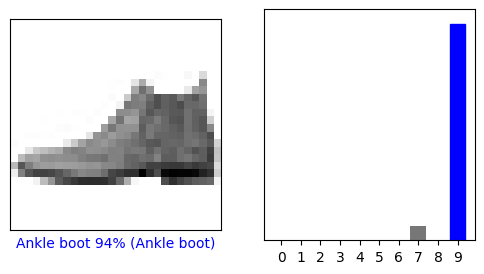

In [22]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

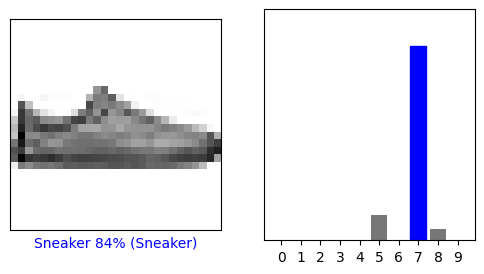

In [23]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

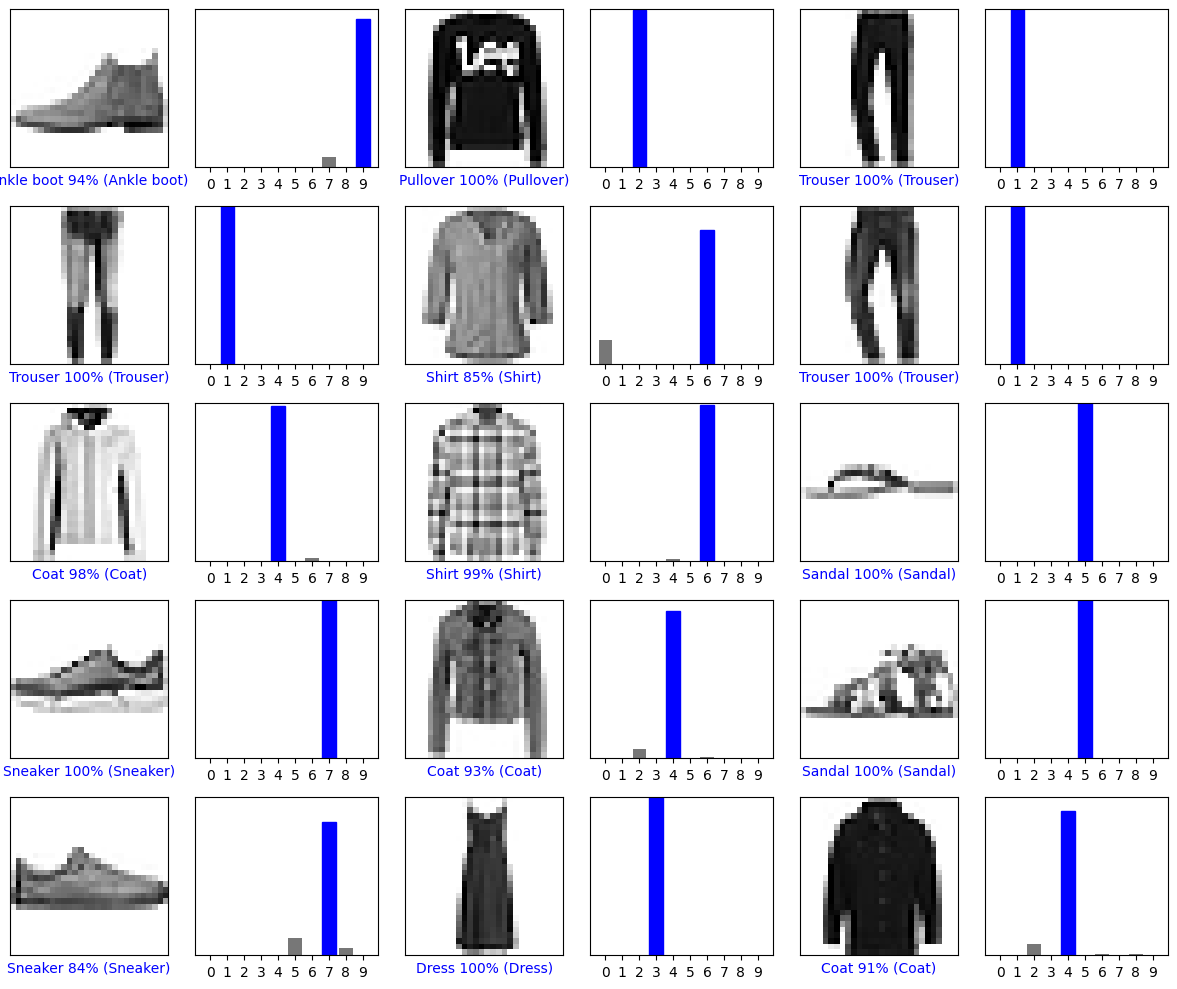

In [24]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [25]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


In [26]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [27]:
predictions_single = probability_model.predict(img)

print(predictions_single)

1/1 [==============================] - 0s 21ms/step
[[2.3243974e-05 5.1282607e-14 9.9664718e-01 1.1013369e-09 2.5888917e-03
  3.7594212e-11 7.4066257e-04 1.8880251e-14 1.3170313e-10 8.3154944e-15]]


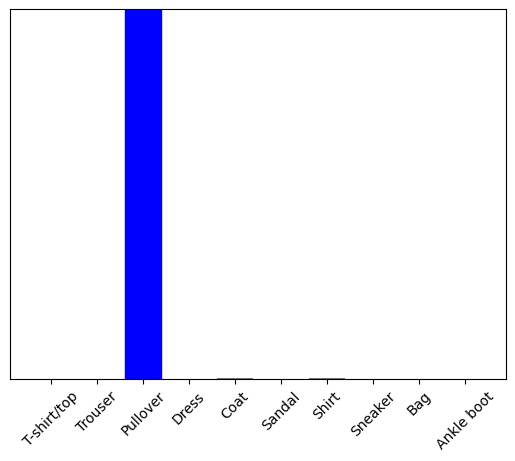

In [28]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [29]:
np.argmax(predictions_single[0])

2